In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["axes.unicode_minus"] = False

In [2]:
m = pd.read_csv("../../data/processed/processed_2.csv")

m

,영화명,감독,제작사,배급사,개봉일,국적,전국 스크린수,전국 매출액,전국 관객수,장르,등급,영화구분
0,명량,김한민,(주)빅스톤픽쳐스,(주)씨제이이엔엠,2014-07,한국,1587.0,1.357484e+11,17613682.0,사극,15세이상관람가,일반영화
1,극한직업,이병헌,(주)어바웃잇영화사 해그림 주식회사(주)씨제이이엔엠,(주)씨제이이엔엠,2019-01,한국,1978.0,1.396480e+11,16264944.0,코미디,15세이상관람가,일반영화
2,신과함께-죄와 벌,김용화,리얼라이즈픽쳐스(주)(주)덱스터스튜디오,롯데쇼핑㈜롯데엔터테인먼트,2017-12,한국,1912.0,1.156987e+11,14410754.0,판타지,12세이상관람가,일반영화
3,국제시장,윤제균,(주)제이케이필름(주)씨제이이엔엠,(주)씨제이이엔엠,2014-12,한국,966.0,1.108280e+11,14245998.0,드라마,12세이상관람가,일반영화
4,어벤져스: 엔드게임,안소니 루소조 루소,마블 스튜디오,월트디즈니컴퍼니코리아 유한책임회사,2019-04,미국,2835.0,1.221827e+11,13934592.0,액션,12세이상관람가,일반영화
...,...,...,...,...,...,...,...,...,...,...,...,...
3874,"극장판 포켓몬스터: 정글의 아이, 코코",야지마 테츠오,"OLM, Inc.",(주)넥스트엔터테인먼트월드(NEW),2021-09,일본,699.0,NaN,360873.0,애니메이션,전체관람가,일반영화
3875,"틱, 틱... 붐!",린-마누엘 미란다,NaN,씨제이 씨지브이(CJ CGV)(주),2021-11,미국,108.0,NaN,208739.0,드라마,12세이상관람가,일반영화
3876,"아치의 노래, 정태춘",고영재,(주)인디플러그,(주)넥스트엔터테인먼트월드(NEW),2022-05,한국,149.0,NaN,1966.0,다큐멘터리,전체관람가,독립/예술영화
3877,"어쩌다 공주, 닭냥이 왕자를 부탁해!",줄리앙 프루네,NaN,(주)팝엔터테인먼트,2022-09,프랑스,306.0,NaN,35210.0,애니메이션,전체관람가,독립/예술영화


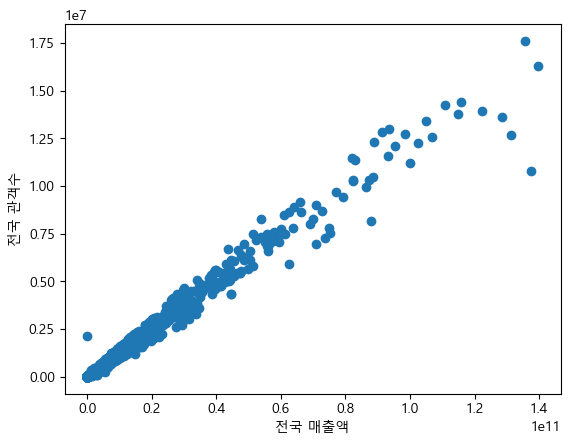

In [3]:
plt.scatter(m["전국 매출액"], m["전국 관객수"])
plt.xlabel("전국 매출액")
plt.ylabel("전국 관객수")
plt.show()

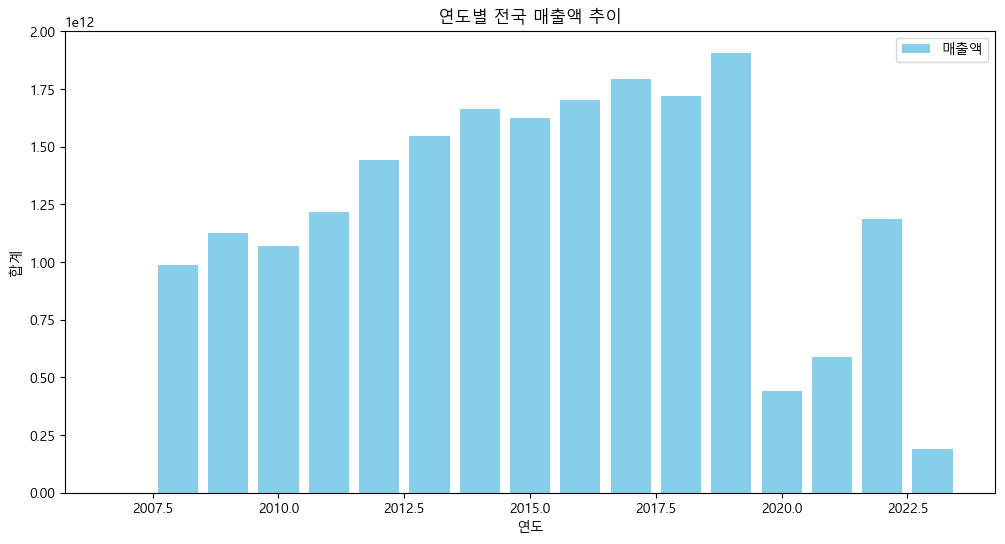

In [4]:
year_sum = m.groupby(pd.to_datetime(m['개봉일']).dt.year).sum()
plt.figure(figsize=(12,6))
plt.bar(year_sum.index, year_sum["전국 매출액"], color="skyblue", label="매출액")
plt.xlabel("연도")
plt.ylabel("합계")
plt.legend()
plt.title("연도별 전국 매출액 추이")
plt.show()

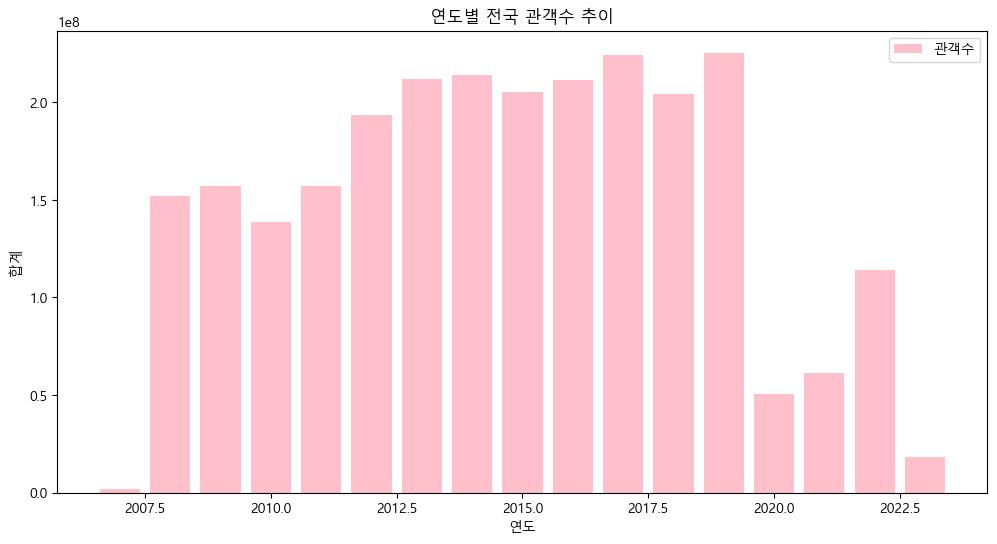

In [5]:
plt.figure(figsize=(12,6))
plt.bar(year_sum.index, year_sum["전국 관객수"], color="pink", label="관객수")
plt.xlabel("연도")
plt.ylabel("합계")
plt.legend()
plt.title("연도별 전국 관객수 추이")
plt.show()

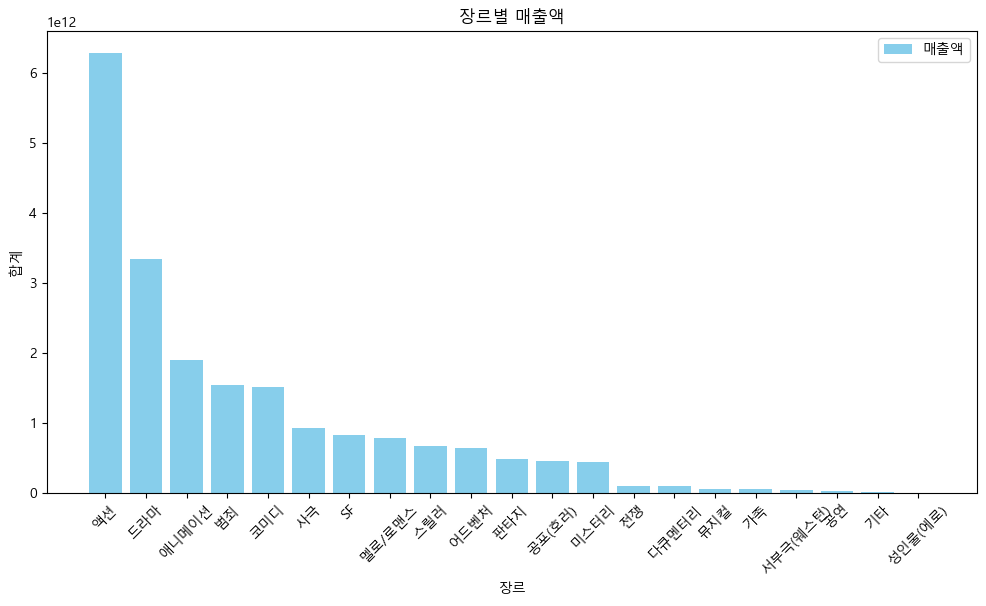

In [6]:
genre_sum = m.groupby('장르').sum().sort_values(by='전국 매출액', ascending=False)
plt.figure(figsize=(12,6))
plt.bar(genre_sum.index, genre_sum['전국 매출액'], color='skyblue', label='매출액')
plt.xlabel('장르')
plt.ylabel('합계')
plt.legend()
plt.title('장르별 매출액')
plt.xticks(rotation=45)
plt.show()

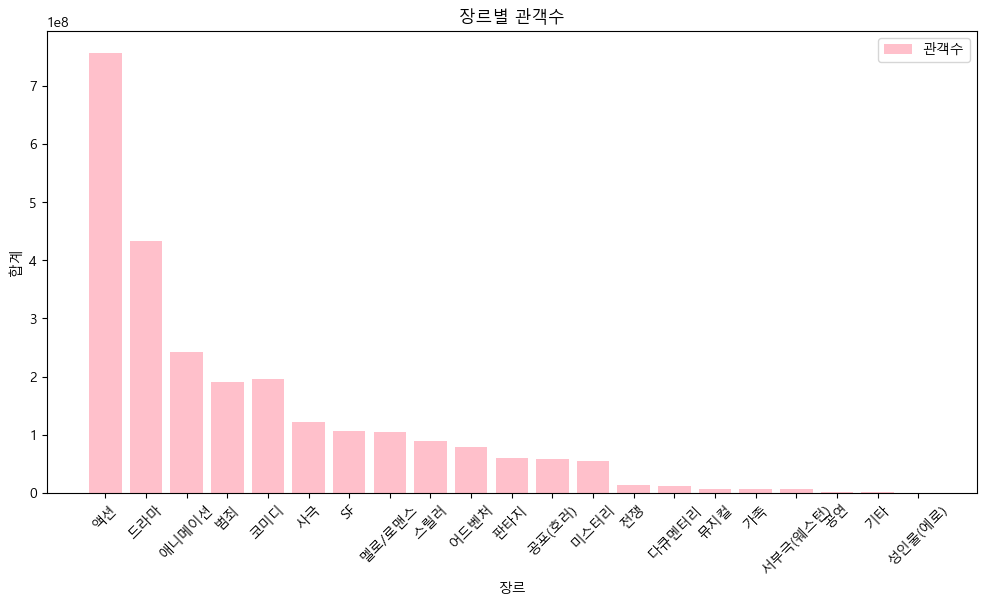

In [7]:
plt.figure(figsize=(12,6))
plt.bar(genre_sum.index, genre_sum['전국 관객수'], color='pink', label='관객수')
plt.xlabel('장르')
plt.ylabel('합계')
plt.legend()
plt.title('장르별 관객수')
plt.xticks(rotation=45)
plt.show()

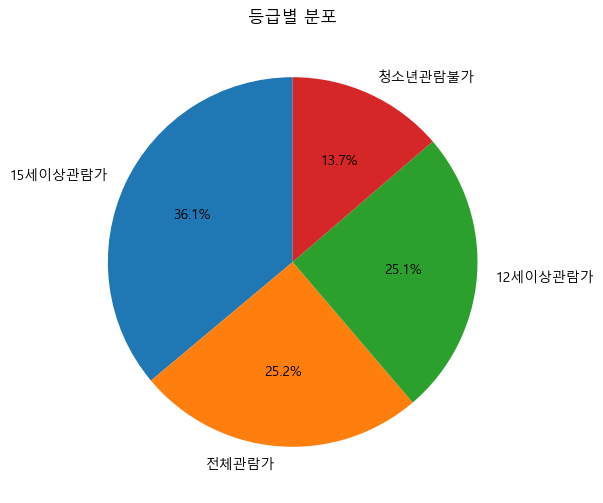

In [8]:
plt.figure(figsize=(6,6))
plt.pie(m["등급"].value_counts(), labels=m["등급"].value_counts().index, autopct="%1.1f%%", startangle=90)
plt.title("등급별 분포")
plt.show()

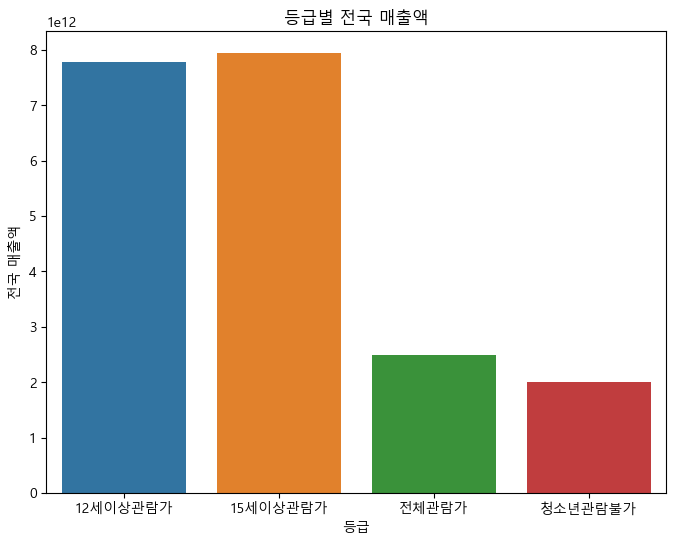

In [9]:
# 고윳값별 전국 매출액 계산
sales_by_rating = m.groupby("등급")["전국 매출액"].sum().reset_index()

# 시각화
plt.figure(figsize=(8,6))
sns.barplot(x="등급", y="전국 매출액", data=sales_by_rating)
plt.title("등급별 전국 매출액")
plt.show()

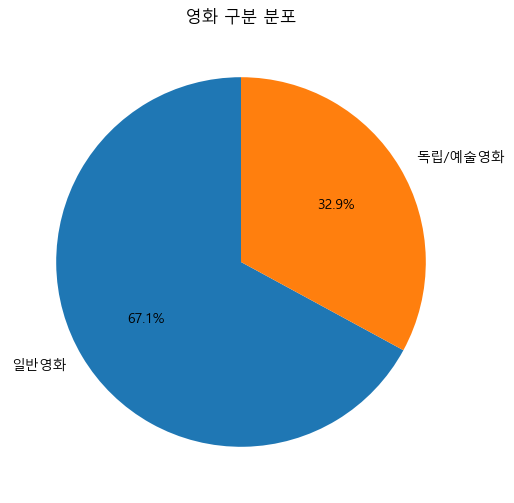

In [10]:
plt.figure(figsize=(6,6))
plt.pie(m["영화구분"].value_counts(), labels=m["영화구분"].value_counts().index, autopct="%1.1f%%", startangle=90)
plt.title("영화 구분 분포")
plt.show()

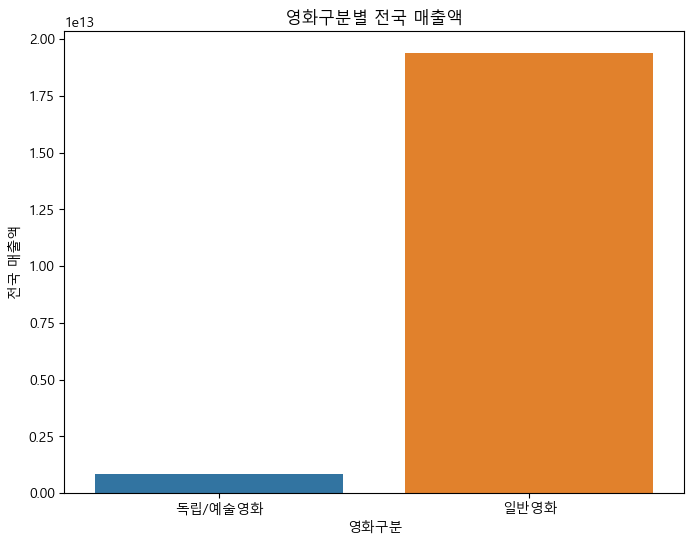

In [11]:
# 고윳값별 전국 매출액 계산
sales_by_rating = m.groupby("영화구분")["전국 매출액"].sum().reset_index()

# 시각화
plt.figure(figsize=(8,6))
sns.barplot(x="영화구분", y="전국 매출액", data=sales_by_rating)
plt.title("영화구분별 전국 매출액")
plt.show()